# K-Means Clustering
## import libraries

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

## Dataset and preprocessing

In [92]:
data = pd.read_csv('Mall.csv')
X = data.iloc[:, [3,4]].values
Z= data.iloc[:, [2]].values

# Analysing the dataset

In [80]:
df = pd.DataFrame(data)
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Elbow Method(looking for a perfect number of clusters)

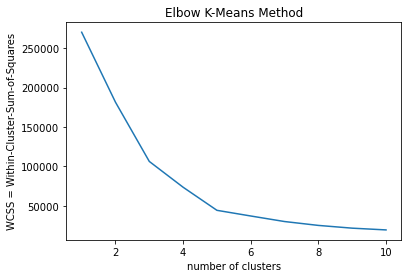

In [93]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow K-Means Method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS = Within-Cluster-Sum-of-Squares')
plt.show()

## K-Means Clustering Algorithm

In [82]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
#Y = kmeans.fit_predict(X)
kmeans.fit(X)
Y = kmeans.predict(X) 
#pred_Y = {'Clusters Predicions:':Y}
#ydf = pd.DataFrame(pred_Y)
#ydf

## K-Means plotting

ValueError: s must be a scalar, or the same size as x and y

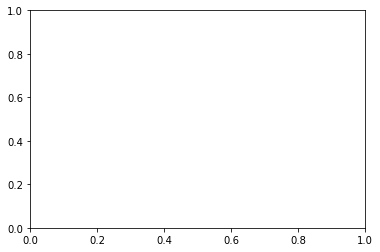

In [94]:
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s = Z[:], c = 'red', label='lincome&spender')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s = 100, c = 'blue', label='medium')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s = 100, c = 'yellow', label='hincome&spender')
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s = 100, c = 'green', label='lincome&saver')
plt.scatter(X[Y == 4, 0], X[Y == 4, 1], s = 100, c = 'grey', label='hincome&saver')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='pink', label='centroids')
plt.legend()
plt.show()